## Import Libraries

In [2]:
import pandas as pd

from sklearn.metrics import confusion_matrix, classification_report

## Load The diabetes Dataset

In [7]:
#Load data set
df = pd.read_csv('diabetes.csv')

In [18]:
#shape of the data
df.shape

(768, 9)

In [19]:
#first 5 records
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
#check for null
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Describe the data

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [13]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [14]:
df.Outcome.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

**Conclusion**
* Here 1(65%) is for diabetic and 0(35%) is for non-diabatic
* Here 1 (Diabetic person) is minority class
* usually we calculate Precision and recall  for minority classes

**What is balance dataset?**
* technically it is  50-50% 
* in real if minority class > 10% then it is balance dataset (in this ex it is 35%)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Split the data

In [21]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', ]]
y = df[['Outcome']]

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size =0.8, random_state = 123)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614, 1)
(154, 1)


## Train the DT Model

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)    # training

DecisionTreeClassifier()

* **dt** is our model object where we created the DecisionTreeClassifier()

## Prediction on test data 

In [26]:
# prediction on test data
print('****** prediction on test data *******')
predict_test = dt.predict(X_test)

# Actual Value : y_test
# prediction : predict_test
print('Confusion Matrix')
print(confusion_matrix(y_test, predict_test))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_test, predict_test))

****** prediction on test data *******
Confusion Matrix
[[74 22]
 [15 43]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        96
           1       0.66      0.74      0.70        58

    accuracy                           0.76       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.77      0.76      0.76       154



* Overall Accuracy is important
* precision and Recall is important for minority class (class 1/ Diabetic Person)

In [18]:
predict_test

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0],
      dtype=int64)

## Prediction on train data

In [27]:
# prediction on train data
print('****** prediction on train data *******')
predict_train = dt.predict(X_train)

# Actual Value : y_train
# prediction : predict_train
print('Confusion Matrix')
print(confusion_matrix(y_train, predict_train))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_train, predict_train))

****** prediction on train data *******
Confusion Matrix
[[404   0]
 [  0 210]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       404
           1       1.00      1.00      1.00       210

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



* **train accuracy = 100%**   
* **test accuracy = 77%**
* as here model works well on train data but not so well on test data it is a **overfitting** situation

## Plot The Decision Tree

In [28]:
from sklearn import tree

[Text(0.535703316953317, 0.96875, 'X[1] <= 143.5\ngini = 0.45\nsamples = 614\nvalue = [404, 210]'),
 Text(0.22128378378378377, 0.90625, 'X[5] <= 26.95\ngini = 0.36\nsamples = 471\nvalue = [360, 111]'),
 Text(0.0687960687960688, 0.84375, 'X[5] <= 26.35\ngini = 0.061\nsamples = 128\nvalue = [124, 4]'),
 Text(0.044226044226044224, 0.78125, 'X[7] <= 59.0\ngini = 0.034\nsamples = 115\nvalue = [113, 2]'),
 Text(0.02457002457002457, 0.71875, 'X[6] <= 0.675\ngini = 0.018\nsamples = 109\nvalue = [108, 1]'),
 Text(0.014742014742014743, 0.65625, 'gini = 0.0\nsamples = 91\nvalue = [91, 0]'),
 Text(0.0343980343980344, 0.65625, 'X[6] <= 0.688\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(0.02457002457002457, 0.59375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.044226044226044224, 0.59375, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.06388206388206388, 0.71875, 'X[6] <= 0.343\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.05405405405405406, 0.65625, 'gini = 0.0\nsample

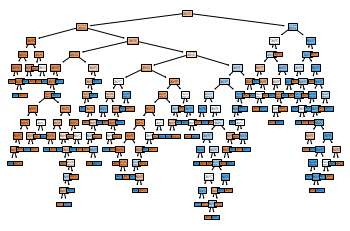

In [29]:
tree.plot_tree(dt, filled=True)

**Note:**

  * Complex model =====> Overfitting
  * in above tree it is clear that tree has more depth, andmore depth means model is complex so there is **Overfitting** occurs
  * to overcome this Overfitting we need set depth of model tree using **max_depth** parameter 
  * but it should not be very less else there is **Underfitting** Problem occurs
  * Therefor the optimal value of max_depth is needed 

### max_depth= 5

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth= 5)
dt.fit(X_train, y_train)    # training

DecisionTreeClassifier(max_depth=5)

* there is not specific value (here we select 5) what should be the correct max_depth we should do try and error

In [33]:
# prediction on test data
print('****** prediction on test data *******')
predict_test = dt.predict(X_test)

# Actual Value : y_test
# prediction : predict_test
print('Confusion Matrix')
print(confusion_matrix(y_test, predict_test))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_test, predict_test))

****** prediction on test data *******
Confusion Matrix
[[82 14]
 [19 39]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        96
           1       0.74      0.67      0.70        58

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.78      0.79      0.78       154



In [34]:
# prediction on train data
print('****** prediction on train data *******')
predict_train = dt.predict(X_train)

# Actual Value : y_train
# prediction : predict_train
print('Confusion Matrix')
print(confusion_matrix(y_train, predict_train))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_train, predict_train))

****** prediction on train data *******
Confusion Matrix
[[362  42]
 [ 61 149]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       404
           1       0.78      0.71      0.74       210

    accuracy                           0.83       614
   macro avg       0.82      0.80      0.81       614
weighted avg       0.83      0.83      0.83       614



[Text(191.1784090909091, 199.32, 'X[1] <= 143.5\ngini = 0.45\nsamples = 614\nvalue = [404, 210]'),
 Text(100.82045454545455, 163.07999999999998, 'X[5] <= 26.95\ngini = 0.36\nsamples = 471\nvalue = [360, 111]'),
 Text(49.45909090909091, 126.83999999999999, 'X[5] <= 26.35\ngini = 0.061\nsamples = 128\nvalue = [124, 4]'),
 Text(30.436363636363637, 90.6, 'X[7] <= 59.0\ngini = 0.034\nsamples = 115\nvalue = [113, 2]'),
 Text(15.218181818181819, 54.359999999999985, 'X[6] <= 0.675\ngini = 0.018\nsamples = 109\nvalue = [108, 1]'),
 Text(7.609090909090909, 18.119999999999976, 'gini = 0.0\nsamples = 91\nvalue = [91, 0]'),
 Text(22.827272727272728, 18.119999999999976, 'gini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(45.654545454545456, 54.359999999999985, 'X[6] <= 0.343\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(38.04545454545455, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(53.263636363636365, 18.119999999999976, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 

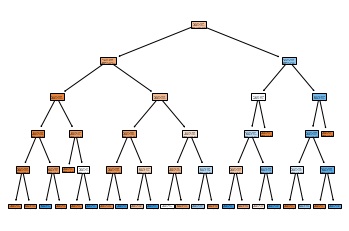

In [32]:
tree.plot_tree(dt, filled=True)

### max_depth= 4

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth= 4)
dt.fit(X_train, y_train)    # training

DecisionTreeClassifier(max_depth=4)

In [36]:
# prediction on test data
print('****** prediction on test data *******')
predict_test = dt.predict(X_test)

# Actual Value : y_test
# prediction : predict_test
print('Confusion Matrix')
print(confusion_matrix(y_test, predict_test))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_test, predict_test))

****** prediction on test data *******
Confusion Matrix
[[81 15]
 [20 38]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        96
           1       0.72      0.66      0.68        58

    accuracy                           0.77       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [37]:
# prediction on train data
print('****** prediction on train data *******')
predict_train = dt.predict(X_train)

# Actual Value : y_train
# prediction : predict_train
print('Confusion Matrix')
print(confusion_matrix(y_train, predict_train))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_train, predict_train))

****** prediction on train data *******
Confusion Matrix
[[345  59]
 [ 64 146]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       404
           1       0.71      0.70      0.70       210

    accuracy                           0.80       614
   macro avg       0.78      0.77      0.78       614
weighted avg       0.80      0.80      0.80       614



## max_depth=3

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth= 3)
dt.fit(X_train, y_train)    # training

DecisionTreeClassifier(max_depth=3)

In [39]:
# prediction on test data
print('****** prediction on test data *******')
predict_test = dt.predict(X_test)

# Actual Value : y_test
# prediction : predict_test
print('Confusion Matrix')
print(confusion_matrix(y_test, predict_test))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_test, predict_test))

****** prediction on test data *******
Confusion Matrix
[[90  6]
 [33 25]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.94      0.82        96
           1       0.81      0.43      0.56        58

    accuracy                           0.75       154
   macro avg       0.77      0.68      0.69       154
weighted avg       0.76      0.75      0.72       154



In [40]:
# prediction on train data
print('****** prediction on train data *******')
predict_train = dt.predict(X_train)

# Actual Value : y_train
# prediction : predict_train
print('Confusion Matrix')
print(confusion_matrix(y_train, predict_train))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_train, predict_train))

****** prediction on train data *******
Confusion Matrix
[[369  35]
 [111  99]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       404
           1       0.74      0.47      0.58       210

    accuracy                           0.76       614
   macro avg       0.75      0.69      0.71       614
weighted avg       0.76      0.76      0.75       614



[Text(0.5, 0.875, 'X[1] <= 143.5\ngini = 0.45\nsamples = 614\nvalue = [404, 210]'),
 Text(0.25, 0.625, 'X[5] <= 26.95\ngini = 0.36\nsamples = 471\nvalue = [360, 111]'),
 Text(0.125, 0.375, 'X[5] <= 26.35\ngini = 0.061\nsamples = 128\nvalue = [124, 4]'),
 Text(0.0625, 0.125, 'gini = 0.034\nsamples = 115\nvalue = [113, 2]'),
 Text(0.1875, 0.125, 'gini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(0.375, 0.375, 'X[1] <= 107.5\ngini = 0.429\nsamples = 343\nvalue = [236, 107]'),
 Text(0.3125, 0.125, 'gini = 0.278\nsamples = 156\nvalue = [130, 26]'),
 Text(0.4375, 0.125, 'gini = 0.491\nsamples = 187\nvalue = [106, 81]'),
 Text(0.75, 0.625, 'X[1] <= 154.5\ngini = 0.426\nsamples = 143\nvalue = [44, 99]'),
 Text(0.625, 0.375, 'X[1] <= 152.5\ngini = 0.5\nsamples = 47\nvalue = [23, 24]'),
 Text(0.5625, 0.125, 'gini = 0.48\nsamples = 40\nvalue = [16, 24]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.875, 0.375, 'X[4] <= 629.5\ngini = 0.342\nsamples = 96\nvalue = [21,

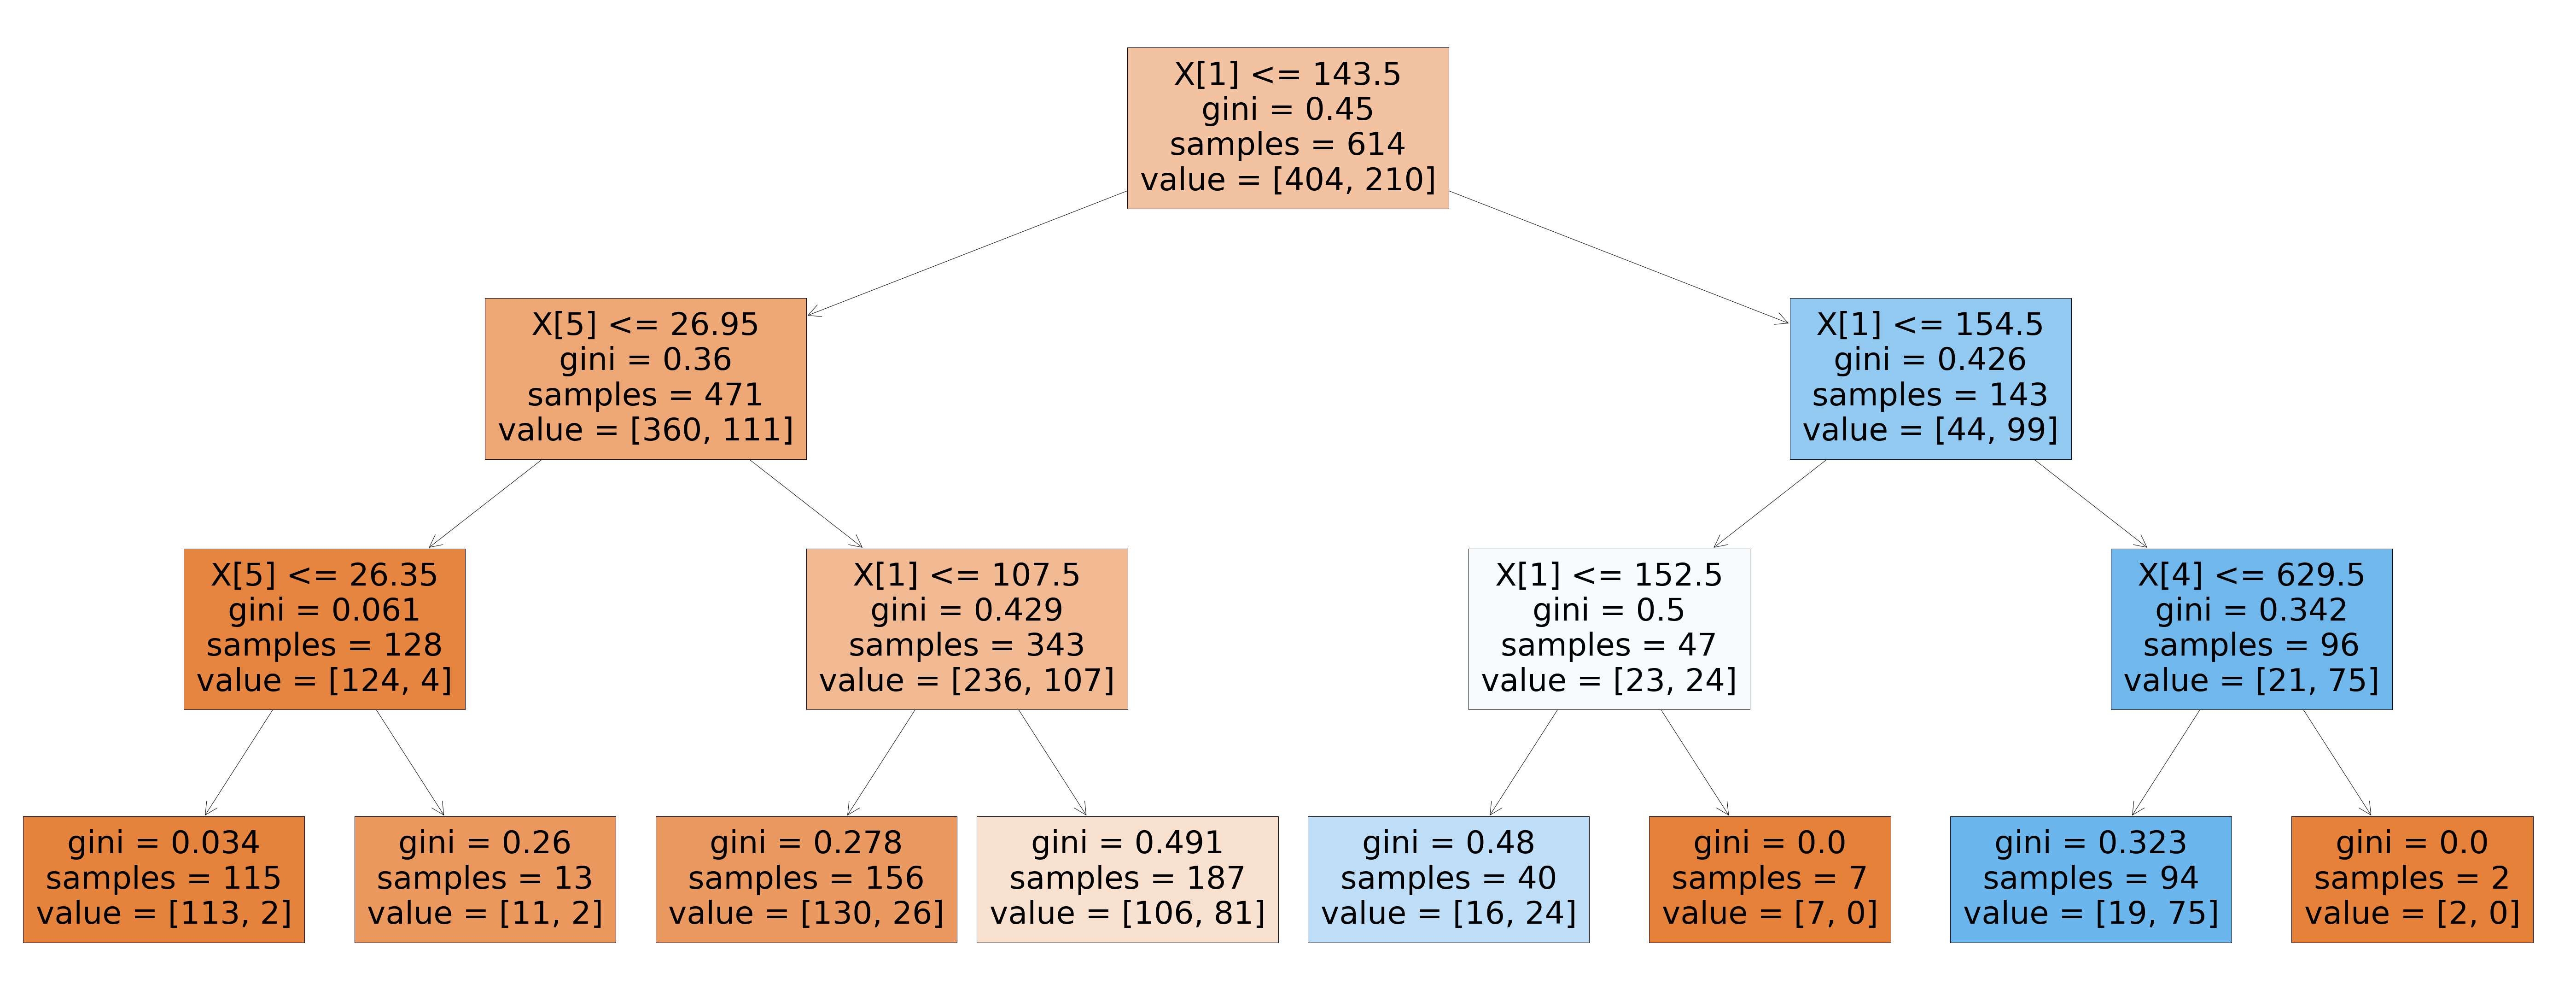

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100,40))
tree.plot_tree(dt, filled=True)

## Comparision of model with respect max_depth values

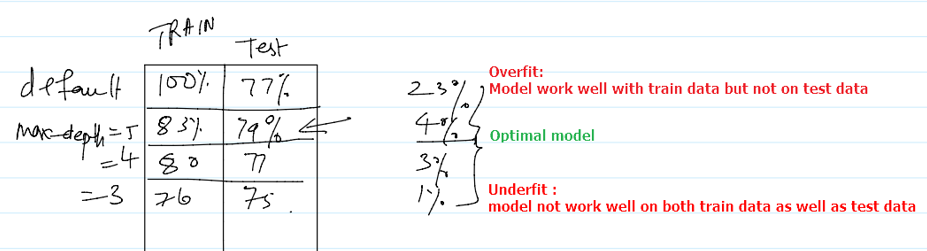

## Explanation of Decision Tree

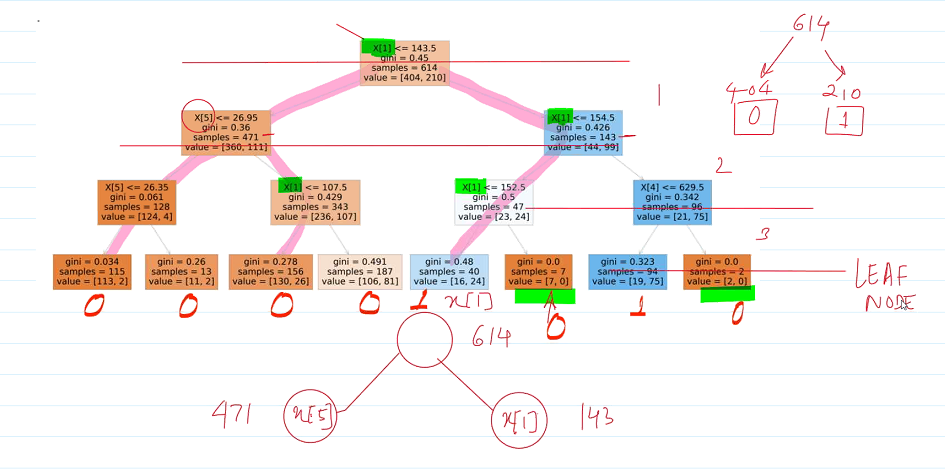

## DT Using Entropy

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth= 3)
dt.fit(X_train, y_train)    # training

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [44]:
# prediction on test data
print('****** prediction on test data :entropy *******')
predict_test = dt.predict(X_test)

# Actual Value : y_test
# prediction : predict_test
print('Confusion Matrix')
print(confusion_matrix(y_test, predict_test))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_test, predict_test))

****** prediction on test data :entropy *******
Confusion Matrix
[[93  3]
 [35 23]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.97      0.83        96
           1       0.88      0.40      0.55        58

    accuracy                           0.75       154
   macro avg       0.81      0.68      0.69       154
weighted avg       0.79      0.75      0.72       154



## End